In [2]:
!pip install pandas

You are using pip version 18.1, however version 19.0.1 is available.
You should consider upgrading via the 'pip install --upgrade pip' command.


In [7]:
symbol= input("Enter Stock Symbol whose upcoming week's stocks you want to predict: ")
import time, datetime
tm =datetime.datetime.today().strftime('%Y-%m-%d')

Enter Stock Symbol whose upcoming week's stocks you want to predict: aapl


In [63]:
import pandas_datareader.data as wb
web_df1 = wb.DataReader(symbol, 'yahoo', '2005-01-01', tm)
web_df1.to_csv('aapl', sep='\t', encoding='utf-8')


In [64]:
import pandas as pd

# Import sklearn.preprocessing.StandardScaler
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

def get_normalised_data(data):
    """
    Normalises the data values using MinMaxScaler from sklearn
    :param data: a DataFrame with columns as  ['index','Open','Close','Volume']
    :return: a DataFrame with normalised value for all the columns except index
    """
    # Initialize a scaler, then apply it to the features
   
    numerical = ['High', 'Low','Open', 'Close', 'Volume']
    data[numerical] = scaler.fit_transform(data[numerical])
    return data

def get_denormalized_data(data):
    scaler.fit(data)
    numerical = ['Close']
    data[numerical] = scaler.inverse_transform(data[numerical])
    return data

def remove_data(data):
    """
    Remove columns from the data
    :param data: a record of all the stock prices with columns as  ['Date','Open','High','Low','Close','Volume']
    :return: a DataFrame with columns as  ['index','Open','Close','Volume']
    """
    # Define columns of data to keep from historical stock data
    item = []
    open = []
    close = []
    volume = []
    high = []
    low = []

    # Loop through the stock data objects backwards and store factors we want to keep
    i_counter = 0
    for i in range(len(data) - 1, -1, -1):
        item.append(i_counter)
        open.append(data['Open'][i])
        close.append(data['Close'][i])
        volume.append(data['Volume'][i])
        high.append(data['High'][i])
        low.append(data['Low'][i])
        i_counter += 1

    # Create a data frame for stock data
    stocks = pd.DataFrame()

    # Add factors to data frame
    stocks['Item'] = item
    stocks['Open'] = open
    stocks['Close'] = pd.to_numeric(close)
    stocks['Volume'] = pd.to_numeric(volume)
    stocks['High']=pd.to_numeric(high)
    stocks['Low'] = pd.to_numeric(low)
    # return new formatted data
    return stocks


In [65]:
stocks = remove_data(web_df1)

#Print the dataframe head and tail
print(stocks.head())
print("---")
print(stocks.tail())

   Item        Open       Close      Volume        High         Low
0     0  155.789993  156.300003  26158500.0  156.330002  153.660004
1     1  155.479996  157.759995  33535500.0  158.130005  154.320007
2     2  154.110001  152.699997  25441500.0  154.479996  151.740005
3     3  154.149994  153.919998  23130600.0  155.139999  151.699997
4     4  156.410004  153.300003  30394000.0  156.729996  152.619995
---
      Item      Open     Close       Volume      High       Low
3536  3536  4.642857  4.946429  556862600.0  4.973571  4.625000
3537  3537  4.619286  4.610714  176388800.0  4.636428  4.523571
3538  3538  4.604286  4.607143  170108400.0  4.660714  4.575000
3539  3539  4.556428  4.567143  274202600.0  4.676429  4.497857
3540  3540  4.627143  4.520714  172998000.0  4.650714  4.471428


In [66]:
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = (18, 12)


def price(x):
    """
    format the coords message box
    :param x: data to be formatted
    :return: formatted data
    """
    return '$%1.2f' % x


def plot_basic(stocks, title='Google Trading', y_label='Price USD', x_label='Trading Days'):
    """
    Plots basic pyplot
    :param stocks: DataFrame having all the necessary data
    :param title:  Title of the plot 
    :param y_label: yLabel of the plot
    :param x_label: xLabel of the plot
    :return: prints a Pyplot againts items and their closing value
    """
    fig, ax = plt.subplots()
    ax.plot(stocks['Item'], stocks['Close'], '#0A7388')

    ax.format_ydata = price
    ax.set_title(title)

    # Add labels
    plt.ylabel(y_label)
    plt.xlabel(x_label)

    plt.show()


def plot_prediction(actual, prediction, train, title='Google Trading vs Prediction', y_label='Price USD', x_label='Trading Days'):
    """
    Plots train, test and prediction
    :param actual: DataFrame containing actual data
    :param prediction: DataFrame containing predicted values
    :param title:  Title of the plot
    :param y_label: yLabel of the plot
    :param x_label: xLabel of the plot
    :return: prints a Pyplot againts items and their closing value
    """
    fig = plt.figure()
    ax = fig.add_subplot(111)

    # Add labels
    plt.ylabel(y_label)
    plt.xlabel(x_label)

    # Plot actual and predicted close values

    plt.plot(actual, '#00FF00', label='Adjusted Close')
    plt.plot(prediction, '#0000FF', label='Predicted Close')
    plt.plot(train,"#eeefff", label='Training Data')

    # Set title
    ax.set_title(title)
    ax.legend(loc='upper left')

    plt.show()


def plot_lstm_prediction(actual, prediction, title='Google Trading vs Prediction', y_label='Price USD', x_label='Trading Days'):
    """
    Plots train, test and prediction
    :param actual: DataFrame containing actual data
    :param prediction: DataFrame containing predicted values
    :param title:  Title of the plot
    :param y_label: yLabel of the plot
    :param x_label: xLabel of the plot
    :return: prints a Pyplot againts items and their closing value
    """
    fig = plt.figure()
    ax = fig.add_subplot(111)

    # Add labels
    plt.ylabel(y_label)
    plt.xlabel(x_label)

    # Plot actual and predicted close values

    plt.plot(actual, '#00FF00', label='Adjusted Close')
    plt.plot(prediction, '#0000FF', label='Predicted Close')

    # Set title
    ax.set_title(title)
    ax.legend(loc='upper left')


    plt.show()



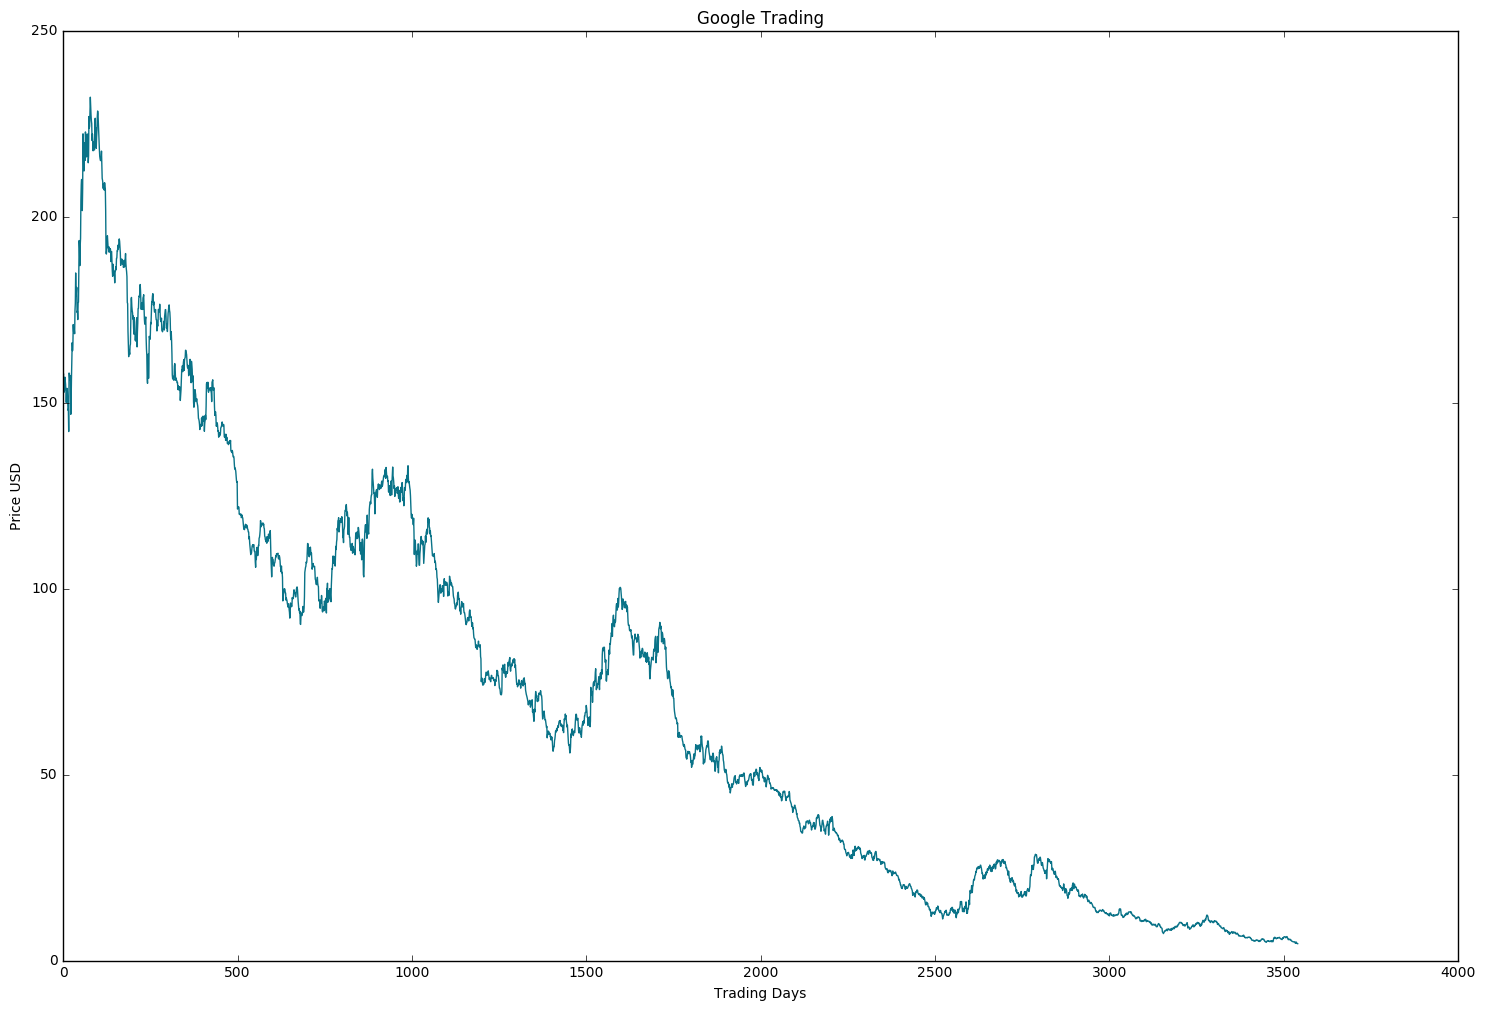

In [67]:
plot_basic(stocks)

In [68]:
import numpy as np

stocks = get_normalised_data(stocks)
print(stocks)

print("\n")
print("Open   --- mean :", np.mean(stocks['Open']),  "  \t Std: ", np.std(stocks['Open']),  "  \t Max: ", np.max(stocks['Open']),  "  \t Min: ", np.min(stocks['Open']))
print("Close  --- mean :", np.mean(stocks['Close']), "  \t Std: ", np.std(stocks['Close']), "  \t Max: ", np.max(stocks['Close']), "  \t Min: ", np.min(stocks['Close']))
print("Volume --- mean :", np.mean(stocks['Volume']),"  \t Std: ", np.std(stocks['Volume']),"  \t Max: ", np.max(stocks['Volume']),"  \t Min: ", np.min(stocks['Volume']))
print("High --- mean :", np.mean(stocks['High']),"  \t Std: ", np.std(stocks['High']),"  \t Max: ", np.max(stocks['High']),"  \t Min: ", np.min(stocks['High']))
print("Low --- mean :", np.mean(stocks['Low']),"  \t Std: ", np.std(stocks['Low']),"  \t Max: ", np.max(stocks['Low']),"  \t Min: ", np.min(stocks['Low']))

      Item      Open     Close    Volume      High       Low
0        0  0.668514  0.667017  0.017652  0.662899  0.662152
1        1  0.667143  0.673433  0.026521  0.670765  0.665082
2        2  0.661087  0.651196  0.016790  0.654815  0.653631
3        3  0.661264  0.656558  0.014012  0.657699  0.653453
4        4  0.671254  0.653833  0.022744  0.664647  0.657536
5        5  0.676073  0.669302  0.026780  0.669673  0.672449
6        6  0.661485  0.665084  0.022056  0.668711  0.660377
7        7  0.656534  0.661040  0.022956  0.660933  0.659223
8        8  0.644113  0.652822  0.020721  0.650051  0.646130
9        9  0.646677  0.639331  0.025203  0.640787  0.642446
10      10  0.655650  0.649395  0.018692  0.651406  0.652610
11      11  0.653971  0.656031  0.029221  0.652586  0.649725
12      12  0.648622  0.653877  0.040424  0.655033  0.644266
13      13  0.640975  0.642627  0.035526  0.643190  0.639339
14      14  0.637173  0.630234  0.052060  0.630124  0.627711
15      15  0.618740  0.

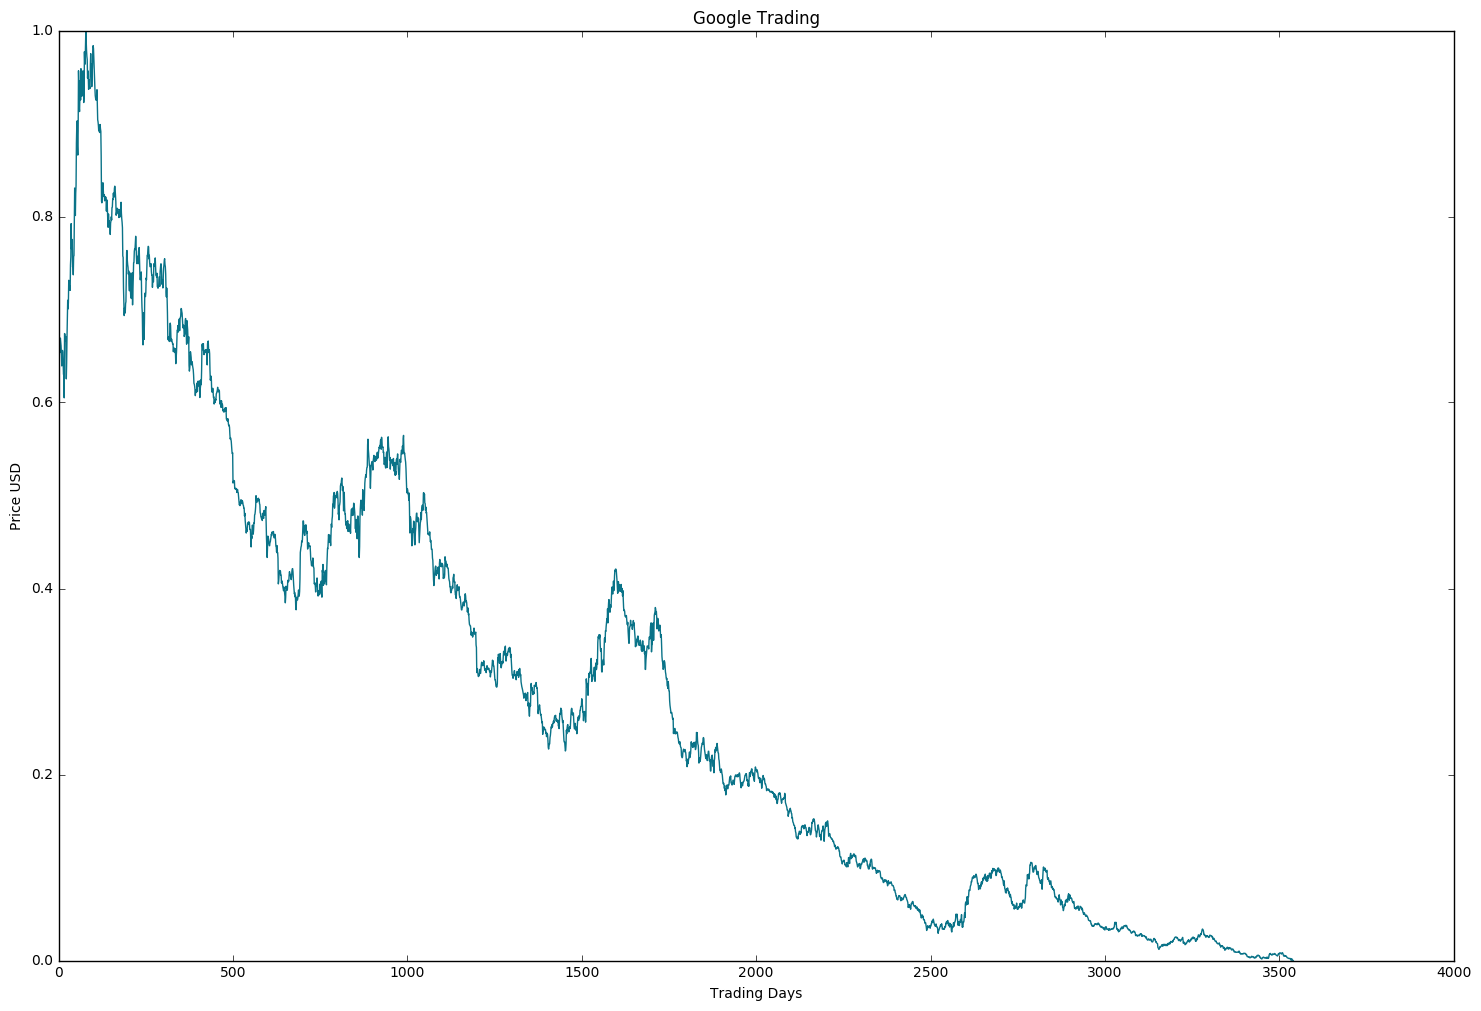

In [69]:
plot_basic(stocks)

In [70]:
!pip install np_utils

You are using pip version 18.1, however version 19.0.1 is available.
You should consider upgrading via the 'pip install --upgrade pip' command.


In [71]:
import math
import pandas as pd
import numpy as np

from IPython.display import display

from keras.layers.core import Dense, Activation, Dropout
from keras.layers.recurrent import LSTM
from keras.models import Sequential
from keras.metrics import mean_squared_error
from sklearn.model_selection import StratifiedKFold

import  time #helper libraries

In [72]:
import numpy as np
import math


def scale_range(x, input_range, target_range):
    """

    Rescale a numpy array from input to target range
    :param x: data to scale
    :param input_range: optional input range for data: default 0.0:1.0
    :param target_range: optional target range for data: default 0.0:1.0
    :return: rescaled array, incoming range [min,max]
    """

    range = [np.amin(x), np.amax(x)]
    x_std = (x - input_range[0]) / (1.0*(input_range[1] - input_range[0]))
    x_scaled = x_std * (1.0*(target_range[1] - target_range[0])) + target_range[0]
    return x_scaled, range


def train_test_split_linear_regression(stocks):
    """
        Split the data set into training and testing feature for Linear Regression Model
        :param stocks: whole data set containing ['Open','Close','Volume'] features
        :return: X_train : training sets of feature
        :return: X_test : test sets of feature
        :return: y_train: training sets of label
        :return: y_test: test sets of label
        :return: label_range: scaled range of label used in predicting price,
    """
    # Create numpy arrays for features and targets
    feature = []
    label = []

    # Convert dataframe columns to numpy arrays for scikit learn
    for index, row in stocks.iterrows():
        # print([np.array(row['Item'])])
        feature.append([(row['Item'])])
        label.append([(row['Close'])])

    # Regularize the feature and target arrays and store min/max of input data for rescaling later
    feature_bounds = [min(feature), max(feature)]
    feature_bounds = [feature_bounds[0][0], feature_bounds[1][0]]
    label_bounds = [min(label), max(label)]
    label_bounds = [label_bounds[0][0], label_bounds[1][0]]

    feature_scaled, feature_range = scale_range(np.array(feature), input_range=feature_bounds, target_range=[-1.0, 1.0])
    label_scaled, label_range = scale_range(np.array(label), input_range=label_bounds, target_range=[-1.0, 1.0])

    # Define Test/Train Split 80/20
    split = .315
    split = int(math.floor(len(stocks['Item']) * split))

    # Set up training and test sets
    X_train = feature_scaled[:-split]
    X_test = feature_scaled[-split:]

    y_train = label_scaled[:-split]
    y_test = label_scaled[-split:]

    return X_train, X_test, y_train, y_test, label_range


def train_test_split_lstm(stocks, prediction_time=1, test_data_size=450, unroll_length=50):
    """
        Split the data set into training and testing feature for Long Short Term Memory Model
        :param stocks: whole data set containing ['Open','Close','Volume'] features
        :param prediction_time: no of days
        :param test_data_size: size of test data to be used
        :param unroll_length: how long a window should be used for train test split
        :return: X_train : training sets of feature
        :return: X_test : test sets of feature
        :return: y_train: training sets of label
        :return: y_test: test sets of label
    """
    # training data
    test_data_cut = test_data_size + unroll_length + 1

    x_train = stocks[0:-prediction_time - test_data_cut].as_matrix()
    y_train = stocks[prediction_time:-test_data_cut]['Close'].as_matrix()

    # test data
    x_test = stocks[0 - test_data_cut:-prediction_time].as_matrix()
    y_test = stocks[prediction_time - test_data_cut:]['Close'].as_matrix()

    return x_train, x_test, y_train, y_test


def unroll(data, sequence_length=24):
    """
    use different windows for testing and training to stop from leak of information in the data
    :param data: data set to be used for unrolling
    :param sequence_length: window length
    :return: data sets with different window.
    """
    result = []
    for index in range(len(data) - sequence_length):
        result.append(data[index: index + sequence_length])
    return np.asarray(result)




In [18]:
stocks_data = stocks.drop(['Item'], axis =1)

display(stocks_data.head())

,Open,Close,Volume,High,Low
0,0.668514,0.667017,0.017652,0.662899,0.662152
1,0.667143,0.673433,0.026521,0.670765,0.665082
2,0.661087,0.651196,0.016790,0.654815,0.653631
3,0.661264,0.656558,0.014012,0.657699,0.653453
4,0.671254,0.653833,0.022744,0.664647,0.657536


In [19]:
X_train, X_test,y_train, y_test = train_test_split_lstm(stocks_data, 5)

unroll_length = 50
X_train = unroll(X_train, unroll_length)
X_test = unroll(X_test, unroll_length)
y_train = y_train[-X_train.shape[0]:]
y_test = y_test[-X_test.shape[0]:]

print("x_train", X_train.shape)
print("y_train", y_train.shape)
print("x_test", X_test.shape)
print("y_test", y_test.shape)
print(y_train)

x_train (2985, 50, 5)
y_train (2985,)
x_test (446, 50, 5)
y_test (446,)
[0.86605095 0.89193545 0.95671265 ... 0.0327433  0.03339622 0.03090382]


In [20]:
from keras.layers.core import Dense, Activation, Dropout
from keras.layers.recurrent import LSTM
from keras.models import Sequential


def build_improved_model(input_dim, output_dim, return_sequences):
    """
    Builds an improved Long Short term memory model using keras.layers.recurrent.lstm
    :param input_dim: input dimension of model
    :param output_dim: ouput dimension of model
    :param return_sequences: return sequence for the model
    :return: a 3 layered LSTM model
    """
    model = Sequential()
    model.add(LSTM(
        input_shape=(None, input_dim),
        units=output_dim,
        return_sequences=return_sequences))

    model.add(Dropout(0.2))

    model.add(LSTM(
        128,
        return_sequences=False))

    model.add(Dropout(0.2))

    model.add(Dense(
        units=1))
    model.add(Activation('linear'))

    return model


def build_basic_model(input_dim, output_dim, return_sequences):
    """
    Builds a basic lstm model 
    :param input_dim: input dimension of the model
    :param output_dim: output dimension of the model
    :param return_sequences: return sequence of the model
    :return: a basic lstm model with 3 layers.
    """
    model = Sequential()
    model.add(LSTM(
        input_shape=(None, input_dim),
        units=output_dim,
        return_sequences=return_sequences))

    model.add(LSTM(
        100,
        return_sequences=False))

    model.add(Dense(
        units=1))
    model.add(Activation('linear'))

    return model




In [21]:
# build basic lstm model
model = build_basic_model(input_dim = X_train.shape[-1],output_dim = unroll_length, return_sequences=True)

# Compile the model
start = time.time()
model.compile(loss='mean_squared_error', optimizer='adam')
print('compilation time : ', time.time() - start)

compilation time :  0.03952455520629883


In [22]:
model.fit(
    X_train,
    y_train,
    epochs=1,
    validation_split=0.05)

Train on 2835 samples, validate on 150 samples
Epoch 1/1
2835/2835 [==============================] - 10s 3ms/step - loss: 0.0109 - val_loss: 6.3718e-05


In [23]:

predictions = model.predict(X_test)

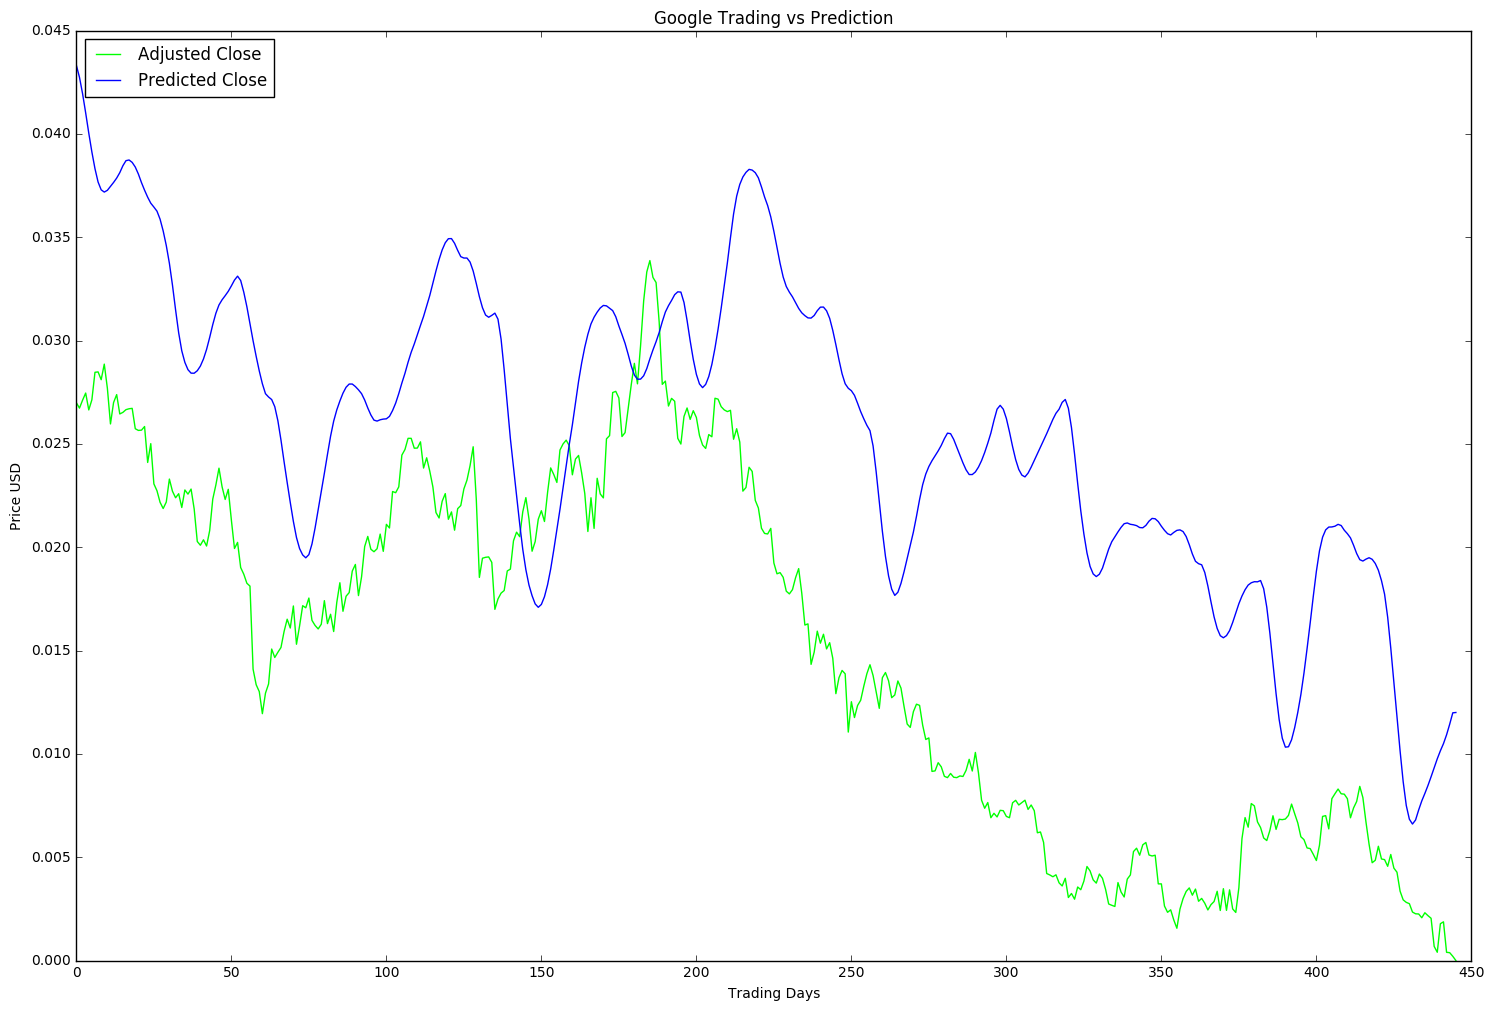

In [24]:
plot_lstm_prediction(y_test,predictions)

In [25]:
trainScore = model.evaluate(X_train, y_train, verbose=0)
print('Train Score: %.8f MSE (%.8f RMSE)' % (trainScore, math.sqrt(trainScore)))

testScore = model.evaluate(X_test, y_test, verbose=0)
print('Test Score: %.8f MSE (%.8f RMSE)' % (testScore, math.sqrt(testScore)))

Train Score: 0.00045453 MSE (0.02131971 RMSE)
Test Score: 0.00014488 MSE (0.01203671 RMSE)


In [26]:
batch_size = 100
epochs = 10

# build improved lstm model
model = build_improved_model( X_train.shape[-1],output_dim = unroll_length, return_sequences=True)

start = time.time()
#final_model.compile(loss='mean_squared_error', optimizer='adam')
model.compile(loss='mean_squared_error', optimizer='adam')
print('compilation time : ', time.time() - start)

compilation time :  0.04284358024597168


In [27]:
model.fit(X_train, 
          y_train, 
          batch_size=batch_size,
          epochs=epochs,
          verbose=2,
          validation_split=0.05
         )

Train on 2835 samples, validate on 150 samples
Epoch 1/10
 - 9s - loss: 0.0180 - val_loss: 5.8515e-05
Epoch 2/10
 - 8s - loss: 0.0018 - val_loss: 5.5631e-05
Epoch 3/10
 - 8s - loss: 0.0015 - val_loss: 2.7414e-05
Epoch 4/10
 - 9s - loss: 0.0012 - val_loss: 3.4118e-05
Epoch 5/10
 - 8s - loss: 0.0012 - val_loss: 4.4489e-05
Epoch 6/10
 - 8s - loss: 0.0011 - val_loss: 3.2847e-05
Epoch 7/10
 - 8s - loss: 0.0010 - val_loss: 6.1662e-05
Epoch 8/10
 - 7s - loss: 0.0011 - val_loss: 2.8890e-05
Epoch 9/10
 - 8s - loss: 0.0010 - val_loss: 4.6782e-05
Epoch 10/10
 - 8s - loss: 0.0010 - val_loss: 6.1600e-05


In [28]:
predictions = model.predict(X_test, batch_size=batch_size)
print(predictions)

[[0.0358014 ]
 [0.03489928]
 [0.03403117]
 [0.03309435]
 [0.03216328]
 [0.03130714]
 [0.03047993]
 [0.02982595]
 [0.02964433]
 [0.02989137]
 [0.03026209]
 [0.03056891]
 [0.0304872 ]
 [0.03064687]
 [0.03102632]
 [0.03185533]
 [0.03238988]
 [0.03240407]
 [0.03234891]
 [0.03227675]
 [0.03200858]
 [0.0316652 ]
 [0.03169183]
 [0.03163409]
 [0.03196769]
 [0.03314937]
 [0.03352522]
 [0.03338184]
 [0.03343048]
 [0.03309364]
 [0.03259938]
 [0.03120304]
 [0.02971935]
 [0.02849395]
 [0.02786451]
 [0.02737018]
 [0.02676541]
 [0.02632553]
 [0.02589194]
 [0.02556415]
 [0.02526767]
 [0.02508087]
 [0.02505272]
 [0.02535014]
 [0.02581507]
 [0.02604781]
 [0.02614712]
 [0.02603431]
 [0.02618029]
 [0.02651513]
 [0.02728458]
 [0.02898901]
 [0.0295421 ]
 [0.02907163]
 [0.02834088]
 [0.02781902]
 [0.02710333]
 [0.02642222]
 [0.02600177]
 [0.02529356]
 [0.02468155]
 [0.02435772]
 [0.02569798]
 [0.02655774]
 [0.02641474]
 [0.02570708]
 [0.02466394]
 [0.0238964 ]
 [0.02293119]
 [0.02187321]
 [0.02053188]
 [0.01

In [73]:
import pandas as pd
pred = pd.DataFrame(predictions)
print(pred)

            0
0    0.035801
1    0.034899
2    0.034031
3    0.033094
4    0.032163
5    0.031307
6    0.030480
7    0.029826
8    0.029644
9    0.029891
10   0.030262
11   0.030569
12   0.030487
13   0.030647
14   0.031026
15   0.031855
16   0.032390
17   0.032404
18   0.032349
19   0.032277
20   0.032009
21   0.031665
22   0.031692
23   0.031634
24   0.031968
25   0.033149
26   0.033525
27   0.033382
28   0.033430
29   0.033094
..        ...
416  0.014100
417  0.015065
418  0.015654
419  0.016498
420  0.017493
421  0.019399
422  0.019831
423  0.019306
424  0.018121
425  0.016889
426  0.015332
427  0.013303
428  0.011364
429  0.009967
430  0.009426
431  0.008926
432  0.009869
433  0.010130
434  0.009606
435  0.009072
436  0.008886
437  0.008706
438  0.008636
439  0.008607
440  0.008382
441  0.008401
442  0.009601
443  0.013389
444  0.015867
445  0.018489

[446 rows x 1 columns]


In [31]:
print(pred)

            0
0    0.035801
1    0.034899
2    0.034031
3    0.033094
4    0.032163
5    0.031307
6    0.030480
7    0.029826
8    0.029644
9    0.029891
10   0.030262
11   0.030569
12   0.030487
13   0.030647
14   0.031026
15   0.031855
16   0.032390
17   0.032404
18   0.032349
19   0.032277
20   0.032009
21   0.031665
22   0.031692
23   0.031634
24   0.031968
25   0.033149
26   0.033525
27   0.033382
28   0.033430
29   0.033094
..        ...
416  0.014100
417  0.015065
418  0.015654
419  0.016498
420  0.017493
421  0.019399
422  0.019831
423  0.019306
424  0.018121
425  0.016889
426  0.015332
427  0.013303
428  0.011364
429  0.009967
430  0.009426
431  0.008926
432  0.009869
433  0.010130
434  0.009606
435  0.009072
436  0.008886
437  0.008706
438  0.008636
439  0.008607
440  0.008382
441  0.008401
442  0.009601
443  0.013389
444  0.015867
445  0.018489

[446 rows x 1 columns]


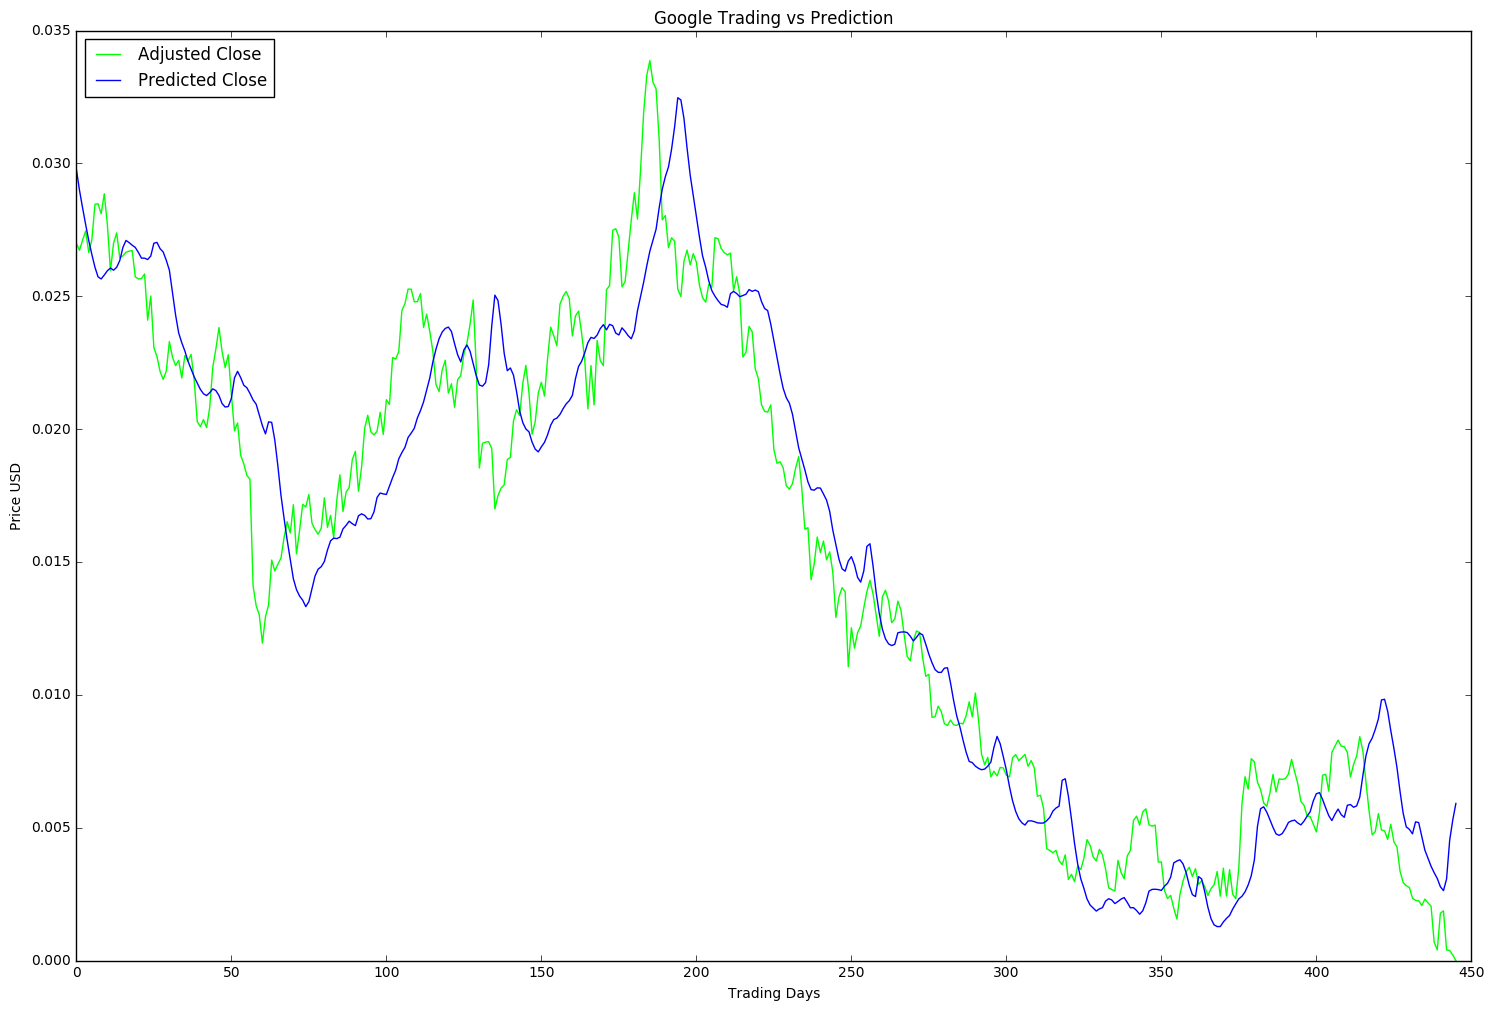

In [27]:
plot_lstm_prediction(y_test,predictions)

In [28]:
trainScore = model.evaluate(X_train, y_train, verbose=0)
print('Train Score: %.8f MSE (%.8f RMSE)' % (trainScore, math.sqrt(trainScore)))

testScore = model.evaluate(X_test, y_test, verbose=0)
print('Test Score: %.8f MSE (%.8f RMSE)' % (testScore, math.sqrt(testScore)))

Train Score: 0.00038832 MSE (0.01970594 RMSE)
Test Score: 0.00000724 MSE (0.00269126 RMSE)


In [29]:
print(predictions)


[[0.02977345]
 [0.02899192]
 [0.02832751]
 [0.02769437]
 [0.02709142]
 [0.02656731]
 [0.02608809]
 [0.02572712]
 [0.02564988]
 [0.02579659]
 [0.02595933]
 [0.02606034]
 [0.02597928]
 [0.02608882]
 [0.02634186]
 [0.02683225]
 [0.02709817]
 [0.02701949]
 [0.02692015]
 [0.0268364 ]
 [0.02664869]
 [0.02643223]
 [0.02643242]
 [0.0263809 ]
 [0.02651343]
 [0.02699395]
 [0.02702548]
 [0.02678959]
 [0.02666524]
 [0.02635286]
 [0.02598044]
 [0.02514537]
 [0.02429794]
 [0.0236183 ]
 [0.02324978]
 [0.02293608]
 [0.02255443]
 [0.02226217]
 [0.02196853]
 [0.02172875]
 [0.02149253]
 [0.02132913]
 [0.0212604 ]
 [0.02136846]
 [0.02151383]
 [0.02144846]
 [0.02126292]
 [0.02095966]
 [0.02082868]
 [0.02084926]
 [0.02115724]
 [0.0219255 ]
 [0.02217208]
 [0.02193736]
 [0.02165088]
 [0.02155517]
 [0.02133965]
 [0.02109663]
 [0.02093489]
 [0.02053454]
 [0.02012869]
 [0.01981961]
 [0.02026974]
 [0.0202531 ]
 [0.01959232]
 [0.01861178]
 [0.01750971]
 [0.01664308]
 [0.01581769]
 [0.01509921]
 [0.0143643 ]
 [0.01

In [36]:
import numpy as np
predictions = predictions.reshape(1,446)

ValueError: cannot delete array elements

In [49]:
predictions = predictions[0][1:]
print(predictions.shape)

(445,)


In [56]:
predictions = predictions.reshape(89,5)

In [57]:
print(predictions.shape)
predictions = scaler.inverse_transform(predictions)

(89, 5)


In [66]:
print(predictions[25][0])

9.937503


In [28]:
range = [np.amin(stocks_data['Close']), np.amax(stocks_data['Close'])]

#Calculate the stock price delta in $

true_delta = testScore*(range[1]-range[0])
print('Delta Price: %.6f - RMSE * Adjusted Close Range')
print((true_delta))

Delta Price: %.6f - RMSE * Adjusted Close Range
0.0022367878102868663


In [79]:
import pandas_datareader.data as wb
web_df2 = wb.DataReader("IBM", 'yahoo', '2005-01-01', '2018-12-30')
web_df2.to_csv('IBM', sep='\t', encoding='utf-8')
print(web_df2)

                  High         Low        Open       Close      Volume  \
Date                                                                     
2005-01-03   99.099998   97.250000   98.970001   97.750000   5295200.0   
2005-01-04   98.419998   96.519997   97.739998   96.699997   5711000.0   
2005-01-05   97.830002   96.400002   96.599998   96.500000   5646700.0   
2005-01-06   96.980003   96.050003   96.540001   96.199997   4561700.0   
2005-01-07   96.800003   95.470001   96.500000   95.779999   6200700.0   
2005-01-10   96.089996   95.239998   95.779999   95.680000   4625100.0   
2005-01-11   95.790001   94.709999   95.680000   95.000000   4746400.0   
2005-01-12   95.279999   94.059998   95.000000   95.209999   5828600.0   
2005-01-13   96.199997   93.699997   95.389999   94.449997   5339400.0   
2005-01-14   94.250000   93.550003   94.010002   94.099998   5520800.0   
2005-01-18   95.339996   93.620003   93.650002   94.900002   8492100.0   
2005-01-19   95.150002   92.930000   9

In [32]:
stocks = remove_data(web_df2)

#Print the dataframe head and tail
print(stocks.head())
print("---")
print(stocks.tail())

TypeError: 'list' object is not callable

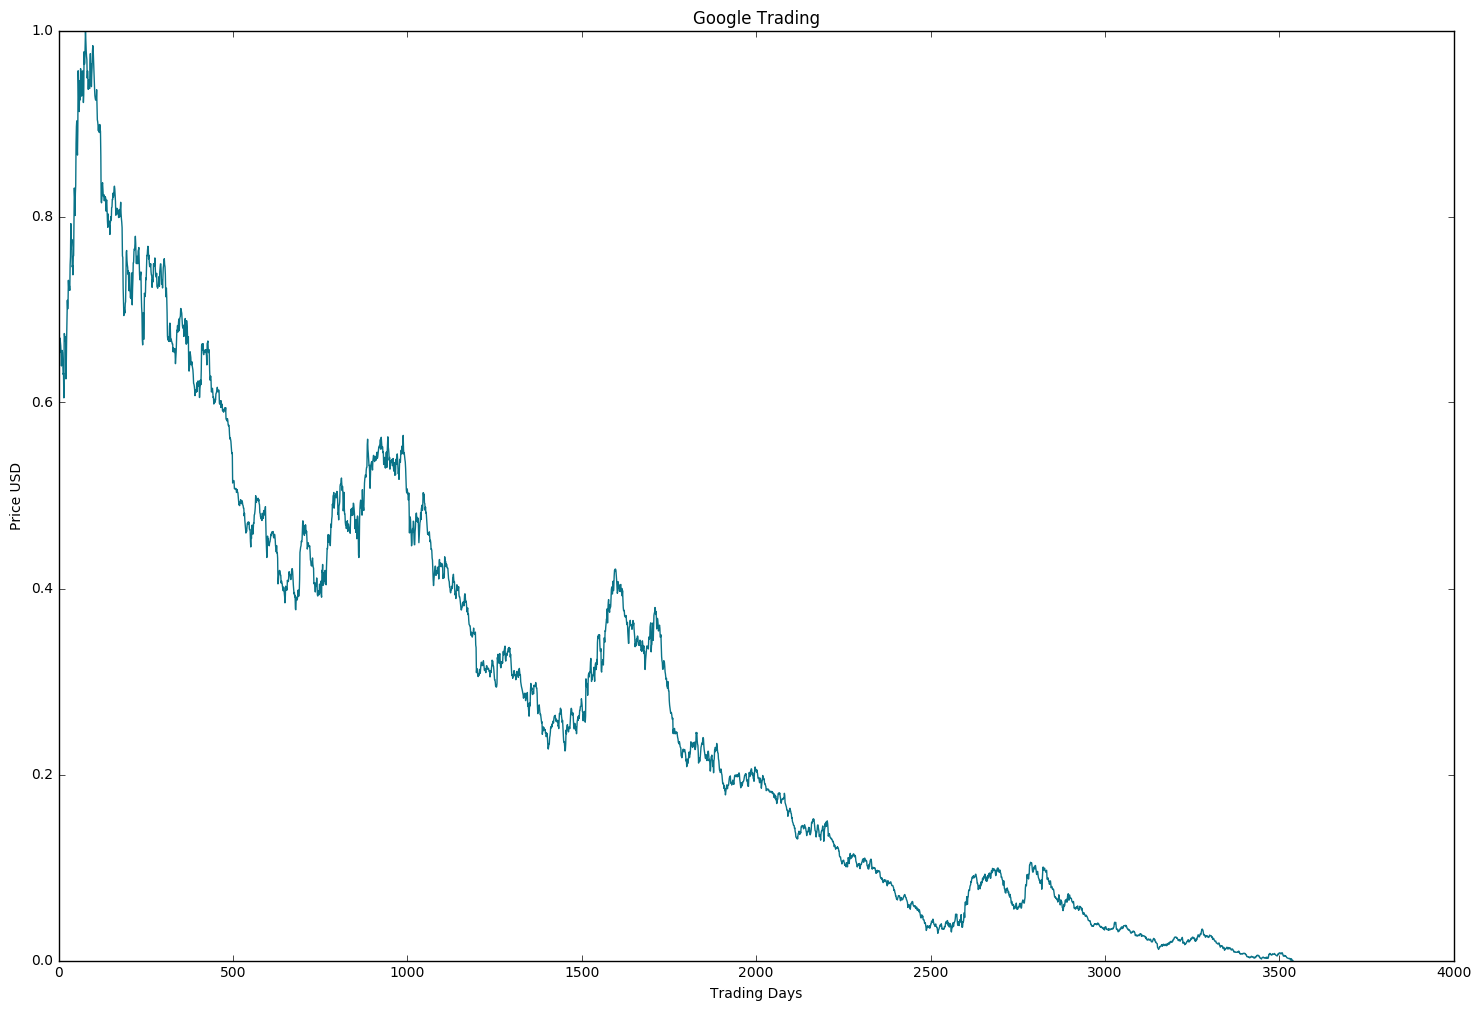

In [33]:
plot_basic(stocks)

In [34]:
X_train, X_test,y_train, y_test = train_test_split_lstm(stocks_data, 5)

unroll_length = 50
X_train = unroll(X_train, unroll_length)
X_test = unroll(X_test, unroll_length)
y_train = y_train[-X_train.shape[0]:]
y_test = y_test[-X_test.shape[0]:]

print("x_train", X_train.shape)
print("y_train", y_train.shape)
print("x_test", X_test.shape)
print("y_test", y_test.shape)

TypeError: 'list' object is not callable

In [35]:
model.fit(
    X_train,
    y_train,
    epochs=3,
    validation_split=0.05)

ValueError: Error when checking input: expected lstm_3_input to have 3 dimensions, but got array with shape (3034, 5)

In [31]:
predictions = model.predict(X_test)

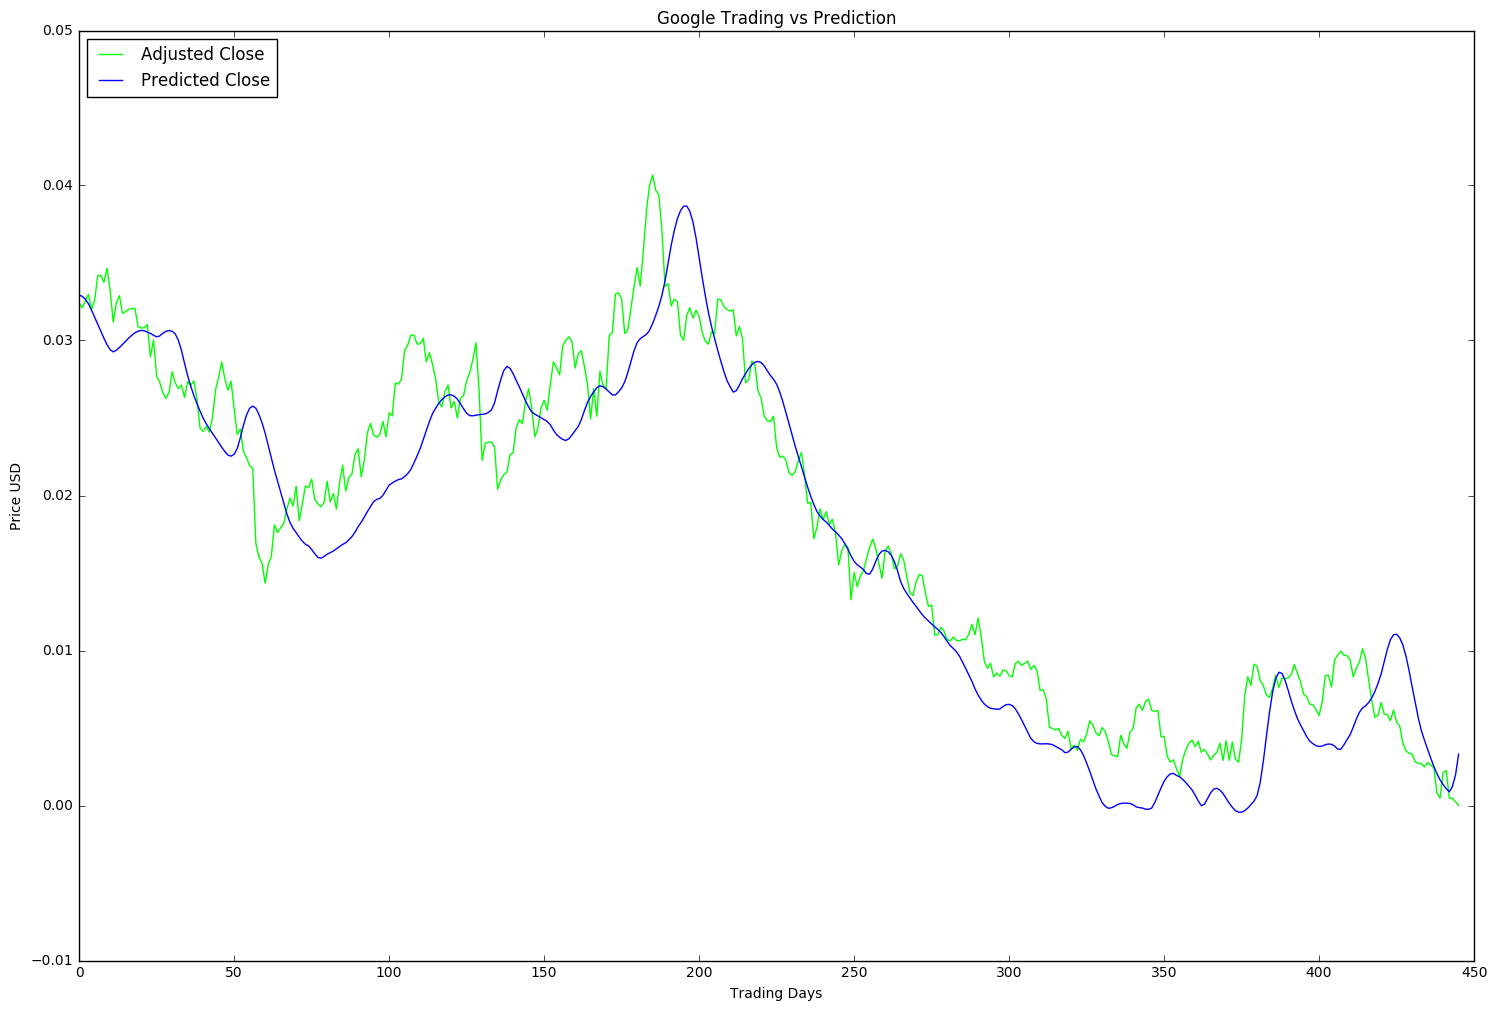

In [32]:
plot_lstm_prediction(y_test,predictions)

            0
0    0.035801
1    0.034899
2    0.034031
3    0.033094
4    0.032163
5    0.031307
6    0.030480
7    0.029826
8    0.029644
9    0.029891
10   0.030262
11   0.030569
12   0.030487
13   0.030647
14   0.031026
15   0.031855
16   0.032390
17   0.032404
18   0.032349
19   0.032277
20   0.032009
21   0.031665
22   0.031692
23   0.031634
24   0.031968
25   0.033149
26   0.033525
27   0.033382
28   0.033430
29   0.033094
..        ...
416  0.014100
417  0.015065
418  0.015654
419  0.016498
420  0.017493
421  0.019399
422  0.019831
423  0.019306
424  0.018121
425  0.016889
426  0.015332
427  0.013303
428  0.011364
429  0.009967
430  0.009426
431  0.008926
432  0.009869
433  0.010130
434  0.009606
435  0.009072
436  0.008886
437  0.008706
438  0.008636
439  0.008607
440  0.008382
441  0.008401
442  0.009601
443  0.013389
444  0.015867
445  0.018489

[446 rows x 1 columns]


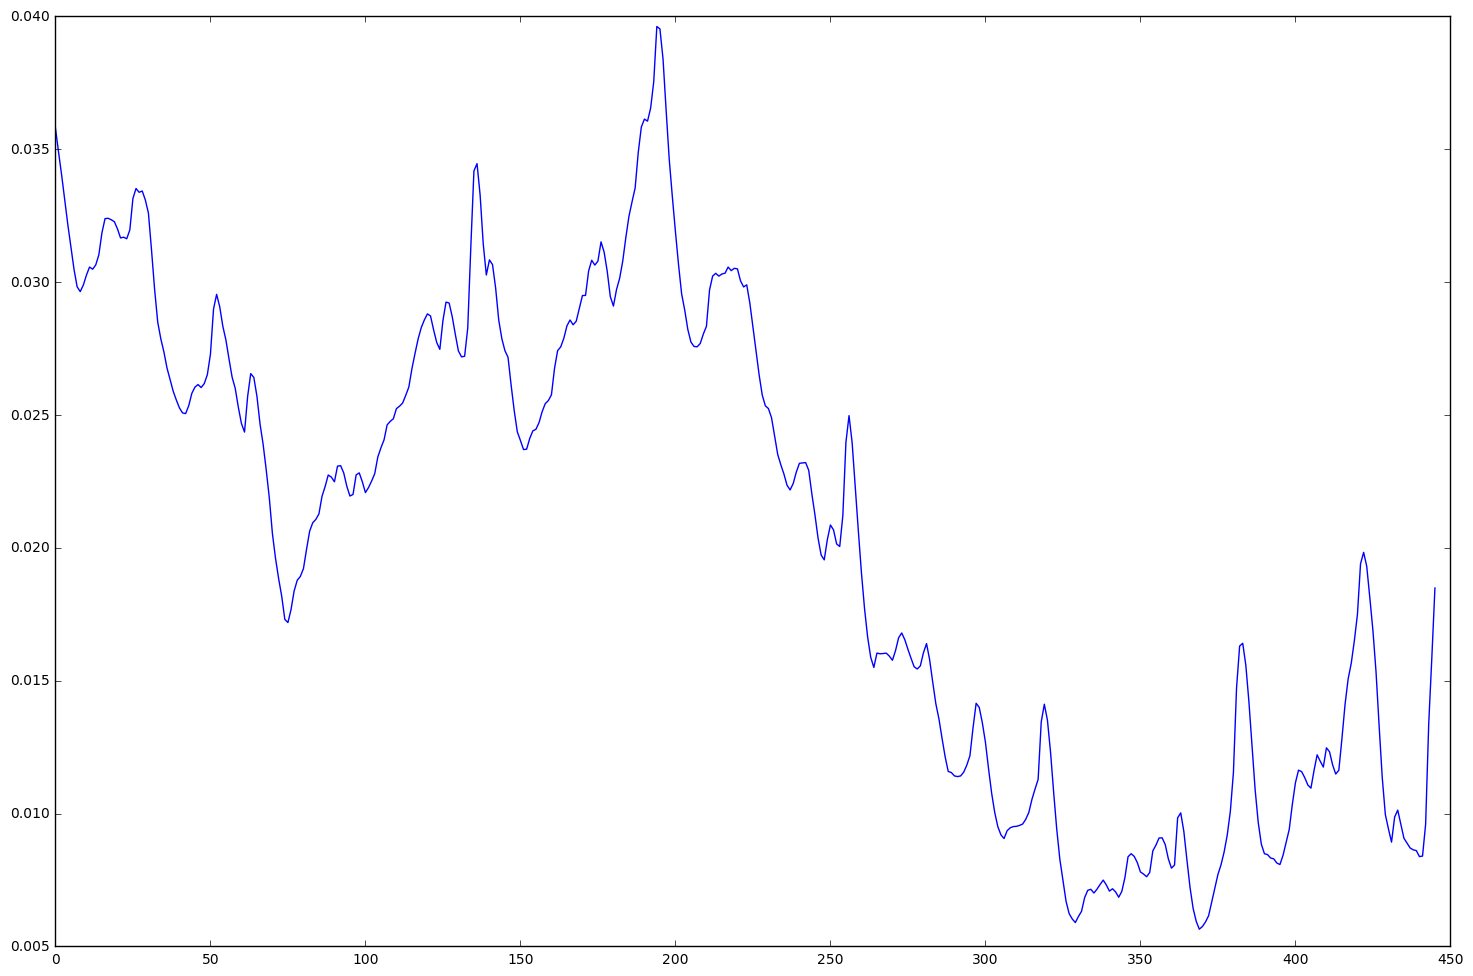

In [75]:
import datetime
from numpy import *
from pylab import plot, show
import pandas_datareader.data as web
#start = datetime.datetime(1993, 1, 1)
#end = datetime.datetime(2019, 1, 1)
#spy = web.DataReader("SPY", 'yahoo', start, end)
closes = pred
print(closes)
plot(closes); show()

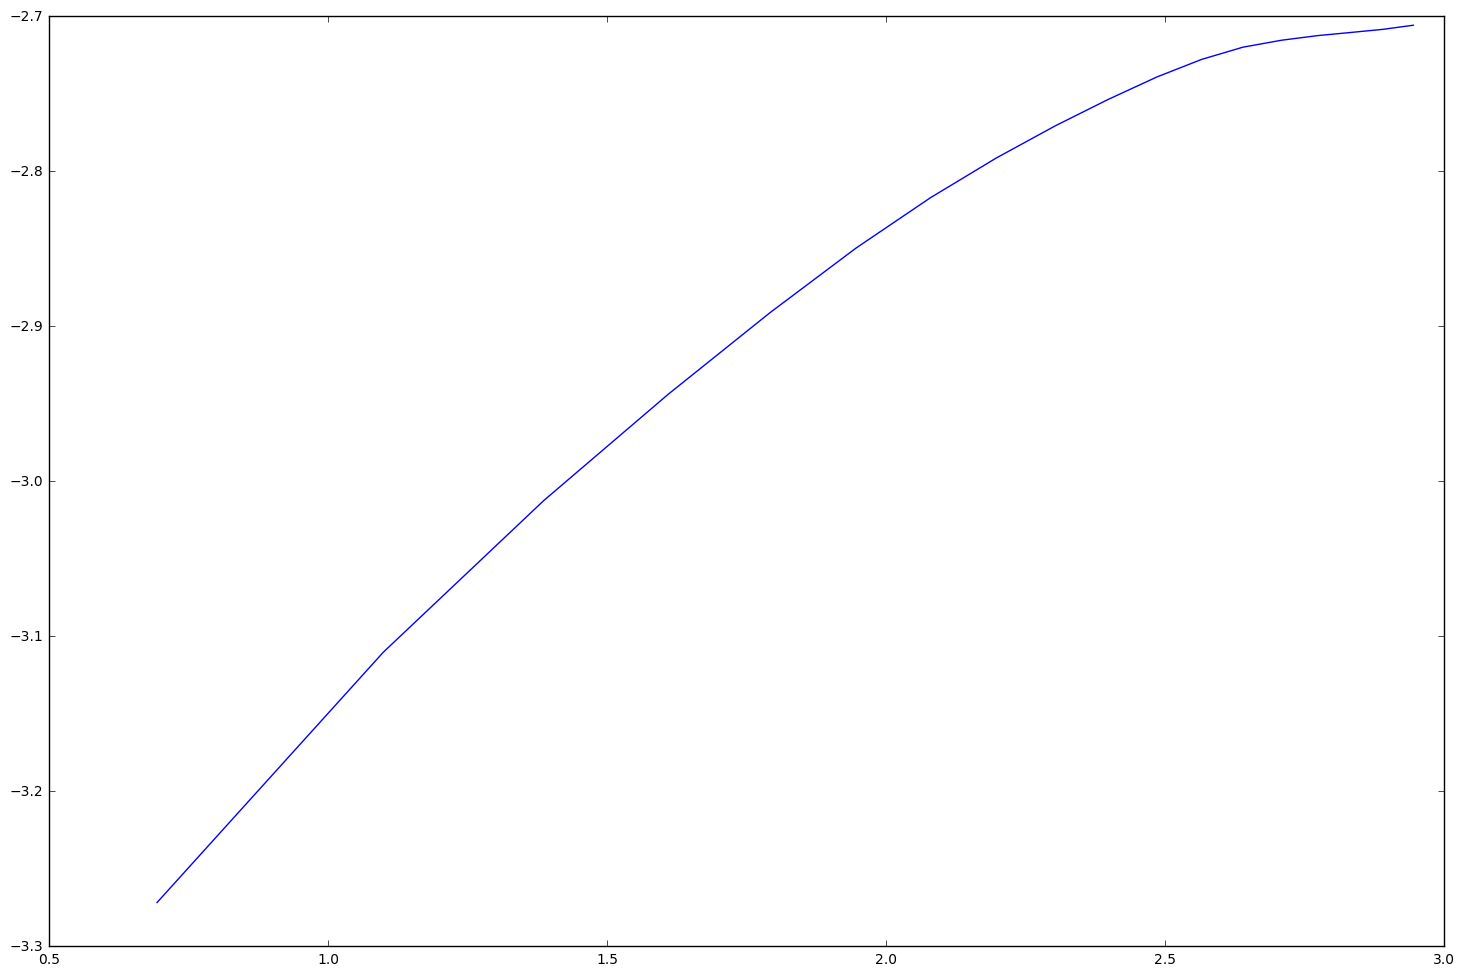

hurst =  [0.47935192]


In [76]:
#Hurst exponent of historical SPY dataPython

# calculate Hurst
lag1 = 2
lags = range(lag1, 20)
tau = [sqrt(std(subtract(closes[lag:], closes[:-lag]))) for lag in lags]
plot(log(lags), log(tau)); show()
m = polyfit(log(lags), log(tau), 1)
hurst = m[0]*2
print ('hurst = ',hurst)

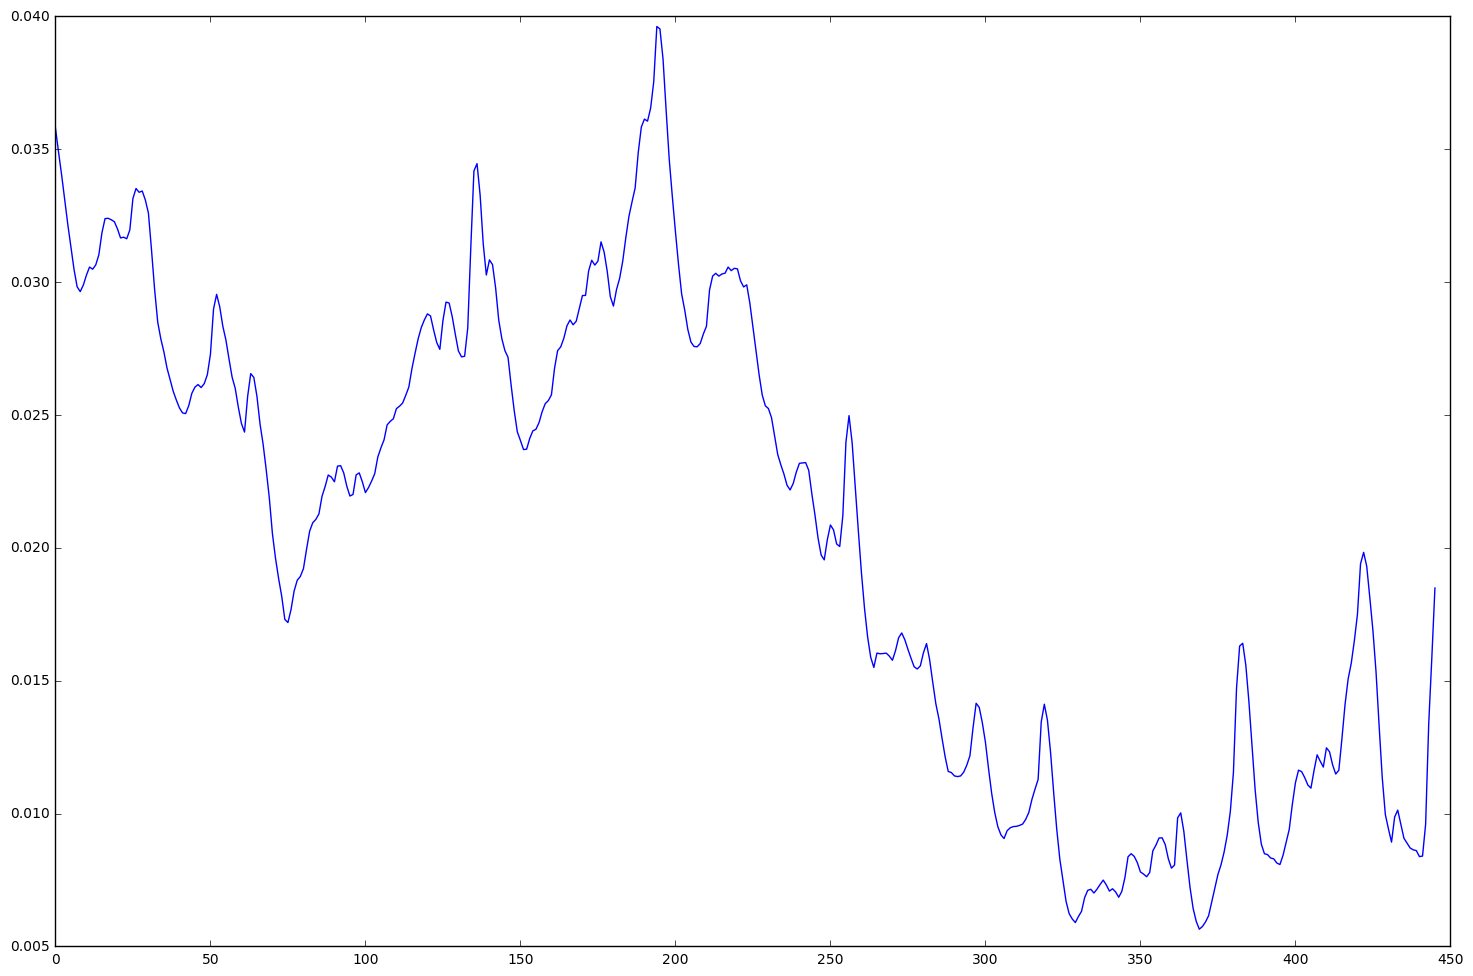

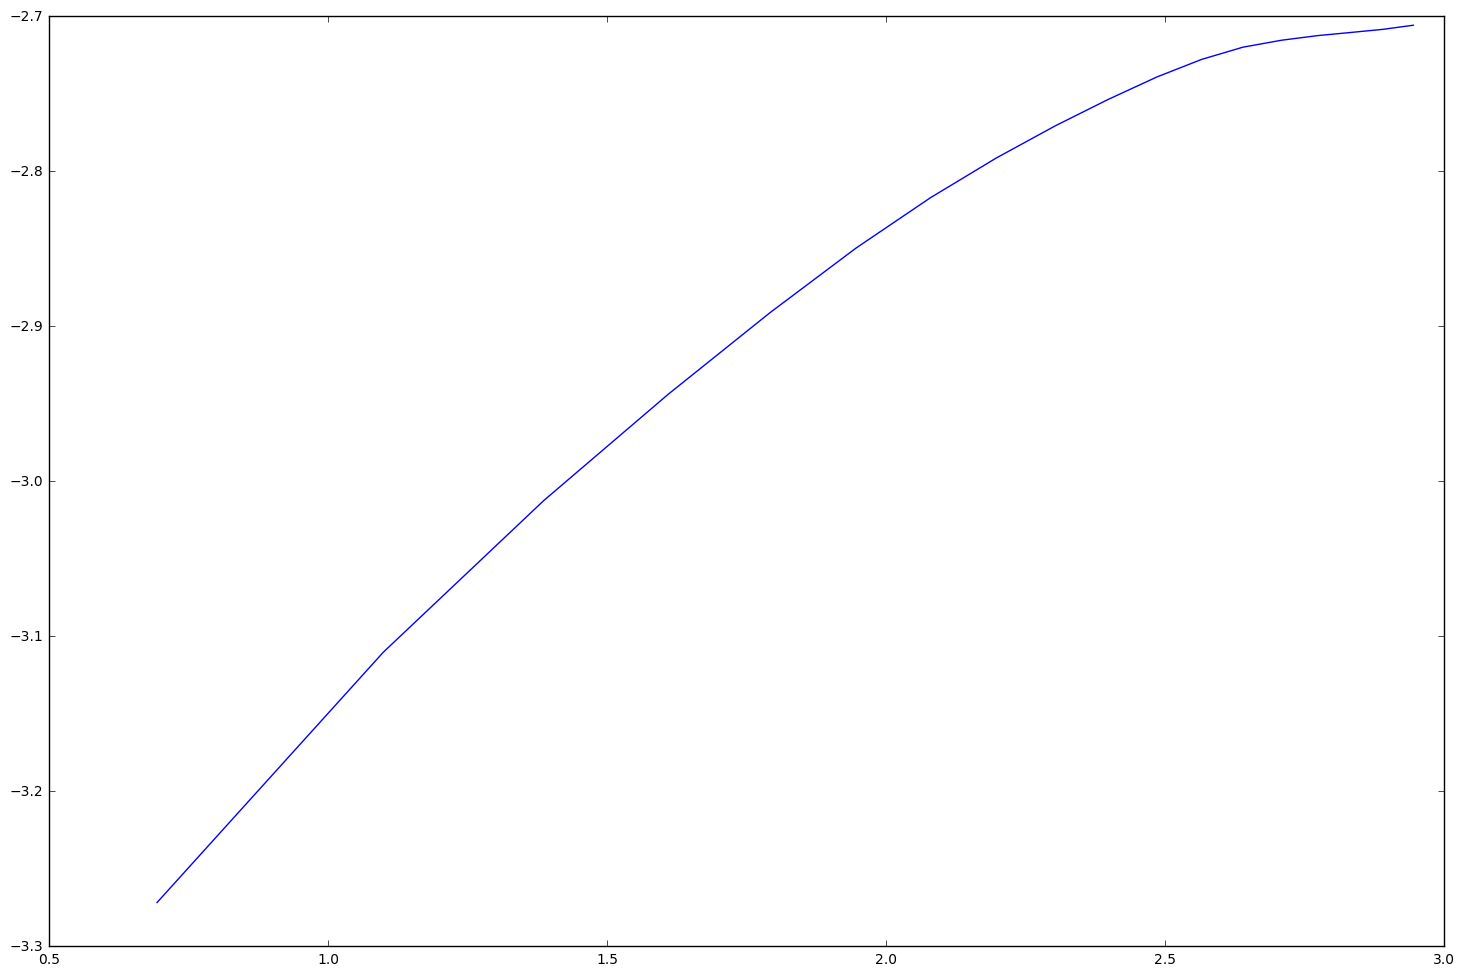

hurst =  [0.47935192]


In [78]:
#alculate Hurst for recent SPY dataPython

# recent prices
closes_recent = pred
plot(closes_recent); show()
# calculate Hurst of recent prices
lag1 = 2
lags = range(lag1, 20)
tau = [sqrt(std(subtract(closes_recent[lag:], closes_recent[:-lag]))) for lag in lags]
plot(log(lags), log(tau)); show()
m = polyfit(log(lags), log(tau), 1)
hurst = m[0]*2
print ('hurst = ',hurst)